<a href="https://colab.research.google.com/github/vikas-sirohi/Deep-Learning-CS7015-/blob/main/Neuron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*2 Input 1 output(Classification task)
, 1 hidden layer with 2 neurons* <br>
* Loss Function: SSR <br>* Activation Function: Logestic function

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, log_loss
from tqdm import tqdm_notebook

from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_blobs

In [ ]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['red', 'yellow', 'green'])

In [ ]:
# Generating Data
data, labels = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=0)
print(data.shape, labels.shape)

(1000, 2) (1000,)


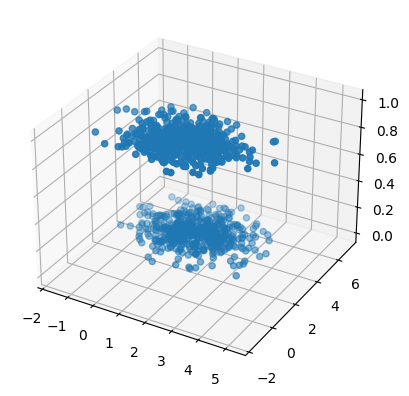

In [ ]:
ax = plt.axes(projection ='3d')
ax.scatter3D(data[:, 0], data[:, 1], labels)
plt.show()

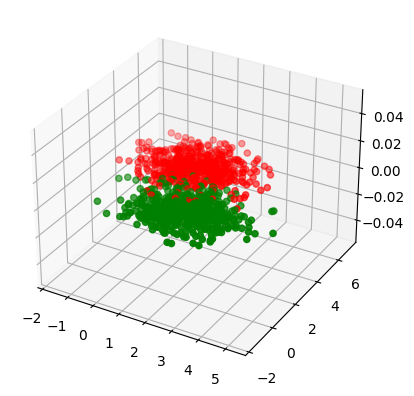

In [ ]:
ax = plt.axes(projection ='3d')
ax.scatter3D(data[:,0], data[:, 1], c=labels, cmap=my_cmap)
plt.show()

In [ ]:
X_train, X_val, Y_train, Y_val = train_test_split(data, labels, stratify=labels, random_state=0)
print(X_train.shape, X_val.shape)

(750, 2) (250, 2)


In [ ]:
x = np.random.randn(2,2)
print(x)
print(x[0,1])
y= np.zeros(1)
print(y)

[[-1.75756906  1.95177725]
 [ 0.6944965   0.58584713]]
1.9517772487192246
[0.]


In [ ]:
class FFNetwork:

  def __init__(self):
    # Input Layer to hiddeb layer -------
    self.W1 = np.random.randn(2,2)
    self.b1 = np.zeros([2,1])
    # Hidden Layer to Output layer
    self.W2 = np.random.randn(1,2)
    self.b2 = 0

  def sigmoid(self, z):
    return 1.0/(1.0 + np.exp(-z))

  def forward_pass(self, x):
    self.x1, self.x2 = x
    # ---------#
    x = x.reshape(2,1)
    self.a1 = self.W1 @ x + self.b1
    self.h1 = self.sigmoid(self.a1)
    #------------------#
    self.a2 = self.W2 @ self.h1 + self.b2
    self.h2 = self.sigmoid(self.a2)
    return self.h2

  def grad(self, x, y):
    y_pred = self.forward_pass(x)

    dh1_da1 = np.array([[self.h1[0][0]*(1 - self.h1[0][0] ), 0], [0, self.h1[1][0]*(1 - self.h1[1][0] )]])
    dL_da1 = (y_pred- y)*(y_pred)*(1- y_pred)*(self.W2 @ dh1_da1)
    dW1_0_0 = dL_da1[0,0]*self.x1
    dW1_0_1 = dL_da1[0,0]*self.x2
    dW1_1_0 = dL_da1[0,1]*self.x1
    dW1_1_1 = dL_da1[0,1]*self.x2
    self.dW1 = np.array([ [dW1_0_0, dW1_0_1 ], [dW1_1_0, dW1_1_1 ] ])
    self.db1 = np.array([ [dL_da1[0,0]] , [dL_da1[0,1]] ])

    self.dW2 = (y_pred - y)*(y_pred)*(1- y_pred)*self.h1.T
    self.db2 =  (y_pred - y)*(y_pred)*(1- y_pred)

  def fit(self, X, Y, epochs =1, lr = 0.1):

    for i in tqdm_notebook(range(epochs), total = epochs, unit = "epoch"):
      dW1 = np.zeros([2,2])
      db1 = np.zeros([2,1])
      dW2 = np.zeros([1,2])
      db2 = 0
      for x, y in zip(X, Y):
        self.grad(x, y)
        dW1 += self.dW1
        db1 += self.db1

        dW2 += self.dW2
        db2 += self.db2

      m = X.shape[1]
      self.W1 -= lr*dW1/m
      self.b1 -= lr*db1/m

      self.W2 -= lr*dW2/m
      self.b2 -= lr*db2/m

  def predict(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.forward_pass(x)
      Y_pred.append(y_pred)
    return np.array(Y_pred)



In [ ]:
ffn = FFNetwork()
ffn.fit(X_train, Y_train, epochs=2000, lr=0.01)

<ipython-input-121-03801fdb8441>:45: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(epochs), total = epochs, unit = "epoch"):


  0%|          | 0/2000 [00:00<?, ?epoch/s]

In [ ]:
Y_pred_train = ffn.predict(X_train)
Y_pred_binarised_train = (Y_pred_train >= 0.5).astype("int").ravel()
Y_pred_val = ffn.predict(X_val)
Y_pred_binarised_val = (Y_pred_val >= 0.5).astype("int").ravel()
accuracy_train = accuracy_score(Y_pred_binarised_train, Y_train)
accuracy_val = accuracy_score(Y_pred_binarised_val, Y_val)

print("Training Accuracy ", round(accuracy_train, 5))
print("Validation Accuracy ", round(accuracy_val, 2))

Training Accuracy  0.96133
Validation Accuracy  0.95


In [ ]:
W1 = np.random.randn(2,2)
b1 = np.zeros([2,1])
h1 = np.matmul(W1, data[0].reshape(2,1)) +b1

print(b1)
print(h1)

[[0.]
 [0.]]
[[1.86039622]
 [6.24294743]]


In [ ]:
print(data[0])

[0.4666179  3.86571303]


In [ ]:
we = np.array([2])
print(we.shape)

(1,)
